# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
df = pd.read_csv('Train.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


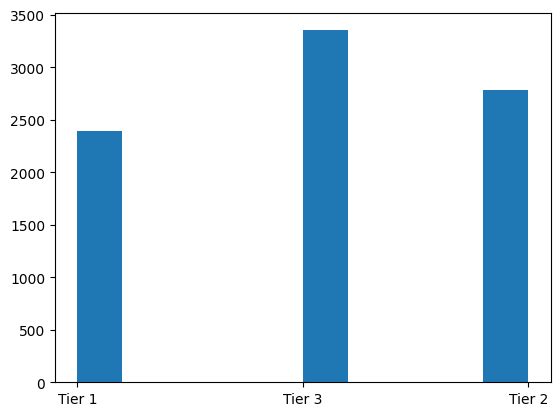

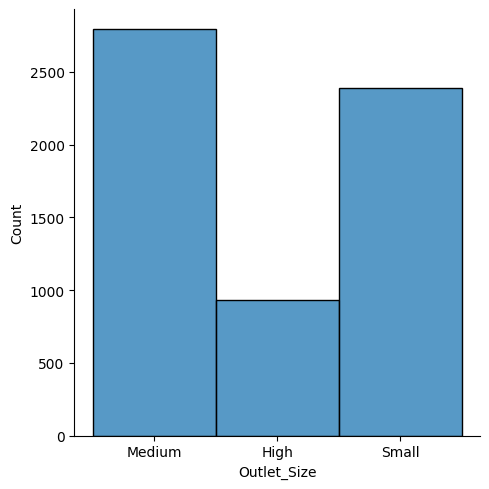

In [3]:
plt.hist(df['Outlet_Location_Type'])
sns.displot(df['Outlet_Size'])


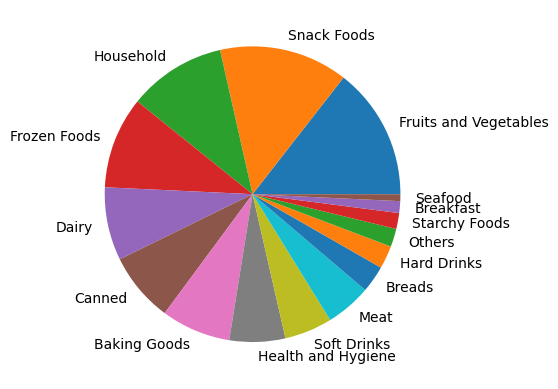

In [4]:
# prompt: plot pie chart of Item_typ

plt.pie(df['Item_Type'].value_counts(), labels=df['Item_Type'].value_counts().index)
plt.show()


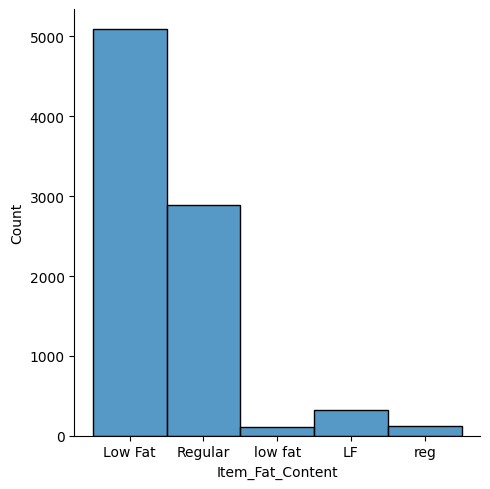

In [5]:
# prompt: density  plot with Item_Fat_content

sns.displot(df['Item_Fat_Content'])


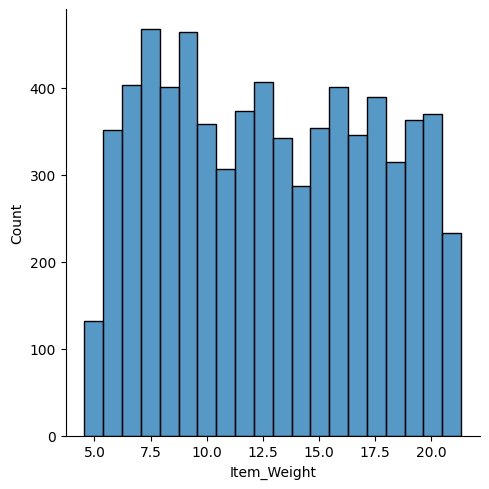

In [6]:
# prompt: density plot of Item_Weight

sns.displot(df['Item_Weight'])


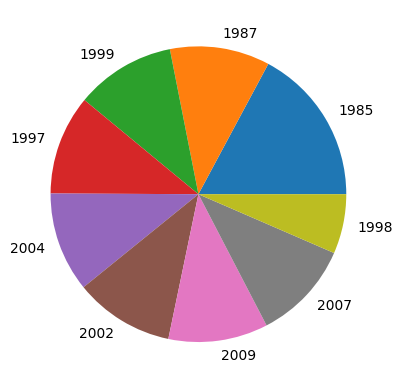

In [7]:
# prompt:  pie chart of Outlet_Establisgment_Year

plt.pie(df['Outlet_Establishment_Year'].value_counts(), labels=df['Outlet_Establishment_Year'].value_counts().index)
plt.show()


# Treating Missing Values


In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#Irrelevant to our model

df.drop('Item_Identifier',axis=1,inplace=True)
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)



In [11]:
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350


In [12]:
print((df["Item_Visibility"] == 0).sum())


526


In [13]:
from numpy import nan
df["Item_Visibility"] = df["Item_Visibility"].replace(0, nan)
df.head(20)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,NaN,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,NaN,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350


#

## Imputing the missing values

In [14]:


from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df['Item_Visibility'] = imputer.fit_transform(df[['Item_Visibility']])
df['Item_Weight'] = imputer.fit_transform(df[['Item_Weight']])
df.head(30)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.070482,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
5,10.395000,Regular,0.070482,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350


In [15]:
obj_df = df.select_dtypes(include=['object']).copy()


In [16]:
obj_df.head(20)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
6,Regular,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
7,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type3
8,Regular,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
9,Regular,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [17]:
obj_df[obj_df.isnull().any(axis=1)]

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
8,Regular,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
9,Regular,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
25,Low Fat,Household,OUT017,NaN,Tier 2,Supermarket Type1
28,Regular,Dairy,OUT010,NaN,Tier 3,Grocery Store
...,...,...,...,...,...,...
8502,Low Fat,Household,OUT045,NaN,Tier 2,Supermarket Type1
8508,Regular,Fruits and Vegetables,OUT045,NaN,Tier 2,Supermarket Type1
8509,Low Fat,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
8514,Regular,Canned,OUT045,NaN,Tier 2,Supermarket Type1


In [18]:
obj_df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df = df.fillna({"Outlet_Size": "Medium"})

In [20]:
df.head(20)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.070482,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
5,10.395000,Regular,0.070482,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,Medium,Tier 2,Supermarket Type1,1076.5986
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,Medium,Tier 2,Supermarket Type1,4710.5350


# Data Encoding

In [21]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])


In [22]:

df.head(20)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,1,0.016047,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,2,0.019278,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,1,0.016760,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,2,0.070482,6,182.0950,0,Medium,Tier 3,Grocery Store,732.3800
4,8.930000,1,0.070482,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052
5,10.395000,2,0.070482,0,51.4008,3,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650000,2,0.012741,13,57.6588,1,High,Tier 3,Supermarket Type1,343.5528
7,12.857645,1,0.127470,13,107.7622,5,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200000,2,0.016687,5,96.9726,7,Medium,Tier 2,Supermarket Type1,1076.5986
9,19.200000,2,0.094450,5,187.8214,2,Medium,Tier 2,Supermarket Type1,4710.5350


In [23]:


from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df.head(20)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,1,0.016047,4,249.8092,9,3735.1380,0,1,0,1,0,0,0,1,0,0
1,5.920000,2,0.019278,14,48.2692,3,443.4228,0,1,0,0,0,1,0,0,1,0
2,17.500000,1,0.016760,10,141.6180,9,2097.2700,0,1,0,1,0,0,0,1,0,0
3,19.200000,2,0.070482,6,182.0950,0,732.3800,0,1,0,0,0,1,1,0,0,0
4,8.930000,1,0.070482,9,53.8614,1,994.7052,1,0,0,0,0,1,0,1,0,0
5,10.395000,2,0.070482,0,51.4008,3,556.6088,0,1,0,0,0,1,0,0,1,0
6,13.650000,2,0.012741,13,57.6588,1,343.5528,1,0,0,0,0,1,0,1,0,0
7,12.857645,1,0.127470,13,107.7622,5,4022.7636,0,1,0,0,0,1,0,0,0,1
8,16.200000,2,0.016687,5,96.9726,7,1076.5986,0,1,0,0,1,0,0,1,0,0
9,19.200000,2,0.094450,5,187.8214,2,4710.5350,0,1,0,0,1,0,0,1,0,0


In [24]:
df.isnull().sum()


Item_Weight                      0
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Item_Outlet_Sales                0
Outlet_Size_High                 0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 1      0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
dtype: int64

#Train Test Split

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Item_Outlet_Sales', axis=1), df['Item_Outlet_Sales'], test_size=0.20, random_state=42)


In [26]:
X_train.values


array([[9.5000000e+00, 2.0000000e+00, 3.5205866e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.8000000e+01, 1.0000000e+00, 4.7473135e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7600000e+01, 2.0000000e+00, 7.6121831e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7600000e+01, 1.0000000e+00, 1.8943666e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0350000e+01, 3.0000000e+00, 5.4362695e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6350000e+01, 0.0000000e+00, 1.6993204e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [27]:
#converting y into 2D array

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)


# Data Standardization

In [28]:
X_train.columns=X_test.columns

In [29]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,[0,2,4]])
X_train.iloc[:,[0,2,4]] = scaler.transform(X_train.iloc[:,[0,2,4]])
X_test.iloc[:,[0,2,4]] = scaler.transform(X_test.iloc[:,[0,2,4]])


# Modeling


##Linear Regression

In [30]:


from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)




LinearRegression()

In [31]:


train_accuracy=linear_regressor.score(X_train,y_train)
print("Train Accuracy: ",train_accuracy)


Train Accuracy:  0.5578903388393766


In [32]:
test_accuracy=linear_regressor.score(X_test,y_test)
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.5800679480300901


##Regularised Linear Regression

In [33]:

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1,max_iter=1000,tol=0.0001)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)



0.5578898974063953

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1,max_iter=1000,tol=0.0001)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)


0.5578903300926322

## Radnom Forest

In [35]:


from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=100)
random_forest_regressor.fit(X_train, y_train)


<ipython-input-35-d9624cf7feba>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regressor.fit(X_train, y_train)


RandomForestRegressor()

In [36]:
train_accuracy=random_forest_regressor.score(X_train,y_train)
print("Train Accuracy: ",train_accuracy)


Train Accuracy:  0.9375543884759169


In [37]:
test_accuracy=random_forest_regressor.score(X_test,y_test)
print("Test Accuracy: ",test_accuracy)


Test Accuracy:  0.5772236541504133


## XGBoost

In [38]:

from xgboost import XGBRegressor
xg_regressor = XGBRegressor()
xg_regressor.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
train_accuracy=xg_regressor.score(X_train, y_train)
print("Train Accuracy: ",train_accuracy)


Train Accuracy:  0.8636314660177709


In [40]:
test_accuracy=xg_regressor.score(X_test, y_test)
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.5544534115141344


#Predicting Test Set Result


In [41]:
dataset=pd.read_csv("Test.csv")
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
# prompt: predict the test.csv input result using regressor model

dataset.drop('Item_Identifier',axis=1,inplace=True)
dataset.drop('Outlet_Establishment_Year',axis=1,inplace=True)
dataset["Item_Visibility"] = dataset["Item_Visibility"].replace(0, nan)

imputer = KNNImputer(n_neighbors=3)
dataset['Item_Visibility'] = imputer.fit_transform(dataset[['Item_Visibility']])
dataset['Item_Weight'] = imputer.fit_transform(dataset[['Item_Weight']])

obj_df = dataset.select_dtypes(include=['object']).copy()
dataset = dataset.fillna({"Outlet_Size": "Medium"})

le = LabelEncoder()
dataset['Item_Fat_Content'] = le.fit_transform(dataset['Item_Fat_Content'])
dataset['Item_Type'] = le.fit_transform(dataset['Item_Type'])
dataset['Outlet_Identifier'] = le.fit_transform(dataset['Outlet_Identifier'])

dataset = pd.get_dummies(dataset, columns=['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


In [43]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,1,0.007565,13,107.8622,9,0,1,0,1,0,0,0,1,0,0
1,8.300000,4,0.038428,4,87.3198,2,0,1,0,0,1,0,0,1,0,0
2,14.600000,1,0.099575,11,241.7538,0,0,1,0,0,0,1,1,0,0,0
3,7.315000,1,0.015388,13,155.0340,2,0,1,0,0,1,0,0,1,0,0
4,12.695633,2,0.118599,4,234.2300,5,0,1,0,0,0,1,0,0,0,1


In [44]:
X=dataset.values
scaler=StandardScaler()
X[:,[0,2,4]] = scaler.fit_transform(X[:,[0,2,4]])


In [45]:
X

array([[ 1.89745979,  1.        , -1.29128752, ...,  1.        ,
         0.        ,  0.        ],
       [-1.03552991,  4.        , -0.65334491, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.44863355,  1.        ,  0.61058357, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.63504136,  1.        ,  0.07219909, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.6135406 ,  2.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.75283211,  2.        ,  0.71693702, ...,  1.        ,
         0.        ,  0.        ]])

In [46]:
# prompt: predict the value of y using random forest regressor

y_pred=random_forest_regressor.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
y_pred

array([1757.598814, 1307.384854,  562.514446, ..., 1853.12114 ,
       3760.125474, 1505.560224])

In [48]:
#save the csv file

output_df = pd.DataFrame({'Item_Outlet_Sales': y_pred})

output_df.to_csv('Test_output.csv')


In [50]:
#generating the pickle file

with open('linear_regressor.pkl', 'wb') as file:
    pickle.dump(linear_regressor, file)


with open('ridge.pkl', 'wb') as file:
    pickle.dump(ridge, file)

with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(random_forest_regressor, file)

with open('xg_regressor.pkl', 'wb') as file:
    pickle.dump(xg_regressor, file)
